## Moduls to install 

In [1]:
# !pip install ipympl
# !pip install wget
# !pip install mitosheet
# !pip install pyjanitor
# !pip install pandas

## Import utilsLaris from github

In [13]:
import os
import wget
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

# Import useful packages

In [32]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
os.environ['NUMEXPR_MAX_THREADS'] = '16'
##############Initialisation parametres#########"
period = "5T"
prefixFiles = {"ElecS219" :"S219*.csv","ElecS114" :"S114*.csv", "Weather" :"WeatherFile*.txt", "Ambiance114": "s114*.txt", "Ambiance219": "s219*.txt"}
dirctory="./Data"
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130', 'sensor_483FDA81E0F4']
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130']
shelly_114 = ['sensor_AAC16E','sensor_AA7DBF' ,'sensor_AA8369']

# Ambiance data Importation

In [2]:
#utilsLaris.importData(annee ="2022", n_monthStart=2,n_monthEnd=5)

2
3
4
5
start merging
We have  13  sensors. Their Id are  [123, 122, 121, 129, 128, 127, 126, 125, 124, 120, 119, 118, -1]
sensor_123
sensor_122
sensor_121
sensor_129
sensor_128
sensor_127
sensor_126
sensor_125
sensor_124
sensor_120
sensor_119
sensor_118
sensor_-1
We have  14  sensors. Their Id are  [104, 103, 102, 101, 100, 105, 107, 106, 110, 109, 108, 113, 112, 111]
sensor_104
sensor_103
sensor_102
sensor_101
sensor_100
sensor_105
sensor_107
sensor_106
sensor_110
sensor_109
sensor_108
sensor_113
sensor_112
sensor_111
We have  8  sensors. Their Id are  ['AAC16E', 'AA7BF5', 'AA7DBF', 'AA4706', 'AA8369', '483FDA81E0F4', 'AA9130', '483FDA81E0FF']
sensor_AAC16E
sensor_AA7BF5
sensor_AA7DBF
sensor_AA4706
sensor_AA8369
sensor_483FDA81E0F4
sensor_AA9130
sensor_483FDA81E0FF


# Weather data

In [33]:
##  Merge multiple CSV Files into a single Pandas dataframe
################################################################################################################
# merging the files
########################################################wgetwget########################################################
# Data préparation for weatherData
################################################################################################################""
# use dayfirst = True to have correct date
weatherData = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["Weather"])
weatherData = utilsLaris.dataPreparationWeather(weatherData)

In [34]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31404 entries, 2022-02-03 14:00:00 to 2022-05-23 14:55:00
Freq: 5T
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather_out   31404 non-null  float64
 1   weather_hum   31404 non-null  float64
 2   weather_bar_  31404 non-null  float64
 3   weather_rad_  31404 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


# Electric data

In [35]:
# merge all files csv and do data préparation 
elecData_219 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS219"])
elecData_114 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS114"])
elecData_219 = utilsLaris.dataPreparationElec(elecData_219, period = period)
elecData_114 = utilsLaris.dataPreparationElec(elecData_114, period = period)

In [37]:
elecData_114.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32007 entries, 2022-02-01 10:45:00 to 2022-05-23 13:55:00
Freq: 5T
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elec_prises_114_w     31943 non-null  float64
 1   elec_general_114_w    31943 non-null  float64
 2   elec_eclairage_114_w  31943 non-null  float64
 3   elec_videoproj_114_w  31943 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [38]:
elecData_219.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32136 entries, 2022-02-01 00:00:00 to 2022-05-23 13:55:00
Freq: 5T
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elec_general_219_w    32124 non-null  float64
 1   elec_eclairage_219_w  32124 non-null  float64
dtypes: float64(2)
memory usage: 753.2 KB


## Read data : Ambiance and windows

In [39]:
tab = utilsLaris.readData(period)
ResampledDict_s114 = tab[0]
ResampledDict_s219 = tab[1]
ResampledDict_shelly = tab[2]
ambianceData_114 = utilsLaris.dataFusionAmbiance(ResampledDict_s114, salle = 114)
ambianceData_219 = utilsLaris.dataFusionAmbiance(ResampledDict_s219, salle = 219)

In [49]:
ambianceData_219.index.min()

Timestamp('2022-02-09 07:50:00', freq='5T')

In [45]:
ResampledDict_shelly

{'sensor_AAC16E':                     state_AAC16E
 date                            
 2022-02-09 08:00:00         open
 2022-02-09 08:05:00         open
 2022-02-09 08:10:00         open
 2022-02-09 08:15:00         open
 2022-02-09 08:20:00         open
 ...                          ...
 2022-05-24 08:45:00        close
 2022-05-24 08:50:00        close
 2022-05-24 08:55:00        close
 2022-05-24 09:00:00        close
 2022-05-24 09:05:00        close
 
 [29966 rows x 1 columns],
 'sensor_AA7BF5':                     state_AA7BF5
 date                            
 2022-03-25 16:45:00         open
 2022-03-25 16:50:00        close
 2022-03-25 16:55:00        close
 2022-03-25 17:00:00        close
 2022-03-25 17:05:00        close
 ...                          ...
 2022-05-24 08:45:00        close
 2022-05-24 08:50:00        close
 2022-05-24 08:55:00        close
 2022-05-24 09:00:00        close
 2022-05-24 09:05:00        close
 
 [17189 rows x 1 columns],
 'sensor_AA7DBF':       

In [23]:
#ResampledDict_shelly

# Data Fusion : All

In [24]:
dfs_219 = [ambianceData_219,elecData_219,weatherData]
dfs_114 = [ambianceData_114,elecData_114,weatherData]
df_219 = utilsLaris.dataFusionAll(dfs=dfs_219, shelly_sensors=shelly_219,ResampledDict_shelly=ResampledDict_shelly)
df_114 = utilsLaris.dataFusionAll(dfs=dfs_114, shelly_sensors=shelly_114,ResampledDict_shelly=ResampledDict_shelly)


In [25]:
df_219.to_csv("HandlingMissingData/df_219_sh.csv")

In [26]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df_219.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster, grandeurs=["temperature","co2","humidity","sound","tvoc", "light",  "elec","state", "weather"])
#colonnesNames

In [27]:
list(colonnesNames.keys())

['temperature',
 'co2',
 'humidity',
 'sound',
 'tvoc',
 'light',
 'elec',
 'state',
 'weather']

['weather_out', 'weather_hum', 'weather_bar_', 'weather_rad_']


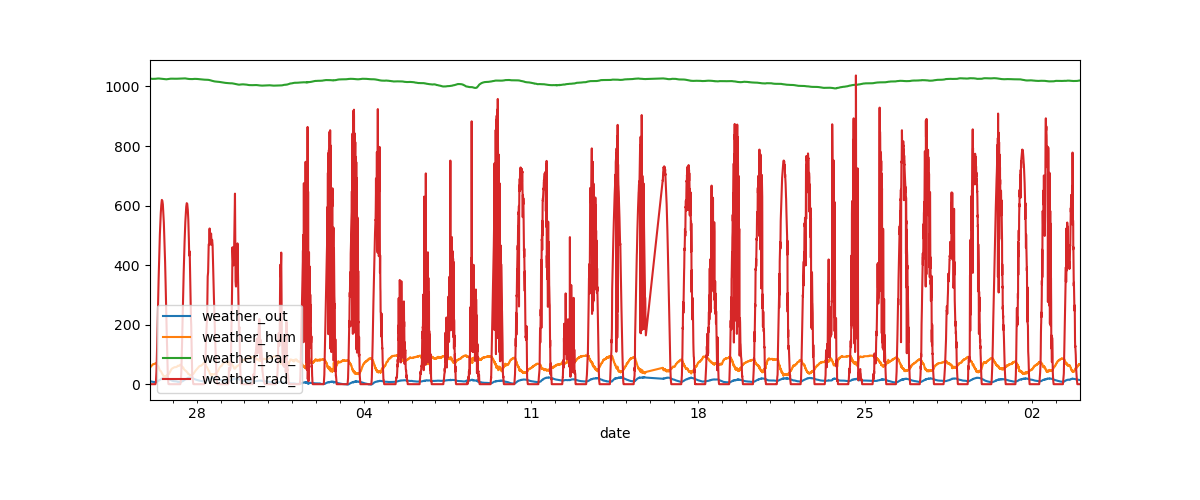

In [28]:
colonnesName = colonnesNames['weather']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

# Analyse measured data

In [29]:
corr = df_219.corr()
corr
raw_data=df_219.copy()

sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(ambianceData_219)

X_test = ambianceData_219
# the model learns that the second feature is double the first
a = np.round(imp.transform(X_test))

In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11319 entries, 2022-03-25 16:45:00 to 2022-05-03 23:55:00
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_100               10568 non-null  float64
 1   tvoc_100              10568 non-null  float64
 2   temperature_100       10568 non-null  float64
 3   humidity_100          10568 non-null  float64
 4   light_100             10568 non-null  float64
 5   sound_100             10568 non-null  float64
 6   co2_101               10569 non-null  float64
 7   tvoc_101              10569 non-null  float64
 8   temperature_101       10569 non-null  float64
 9   humidity_101          10569 non-null  float64
 10  light_101             10569 non-null  float64
 11  sound_101             10569 non-null  float64
 12  co2_102               10565 non-null  float64
 13  tvoc_102              10565 non-null  float64
 14  temperature_102       10565 non-nul